downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/images/cvbook.jpg


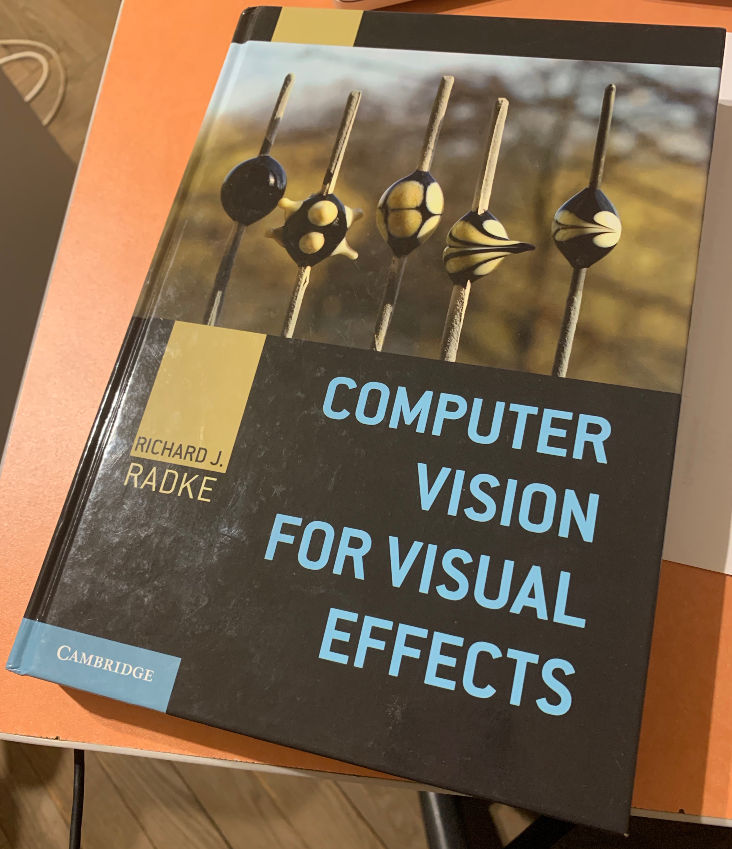

In [1]:
import cv2
import numpy as np
from skimage import io
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

def url_to_image(url):
  print("downloading %s" % (url))
  return cv2.cvtColor(io.imread(url), cv2.COLOR_BGR2RGB)

url = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/images/cvbook.jpg"
img = url_to_image(url)
cv2_imshow(img)

In [2]:
(r,c) = img.shape[:2]
pts1 = np.float32([[241,6], [726, 29], [6, 668], [627, 837]])
print(pts1)

[[241.   6.]
 [726.  29.]
 [  6. 668.]
 [627. 837.]]


In [3]:
pts2 = np.float32([[0,0], [300, 0], [0,400], [300,400]])
print(pts2)

[[  0.   0.]
 [300.   0.]
 [  0. 400.]
 [300. 400.]]


In [4]:
# Implement this function
M = cv2.getPerspectiveTransform(pts1, pts2)
print(M)

[[ 7.53496708e-01  2.67479949e-01 -1.83197586e+02]
 [-3.99227991e-02  8.41850329e-01  4.57029261e+00]
 [ 3.03922821e-04  6.21097907e-04  1.00000000e+00]]


In [6]:
A = []
A.append([pts1[0][0], pts1[0][1], 1, 0, 0, 0, -pts2[0][0]*pts1[0][0], -pts2[0][0]*pts1[0][1]])
A.append([0, 0, 0, pts1[0][0], pts1[0][1], 1, -pts2[0][1]*pts1[0][0], -pts2[0][1]*pts1[0][1]])
A.append([pts1[1][0], pts1[1][1], 1, 0, 0, 0, -pts2[1][0]*pts1[1][0], -pts2[1][0]*pts1[1][1]])
A.append([0, 0, 0, pts1[1][0], pts1[0][1], 1, -pts2[1][1]*pts1[1][0], -pts2[1][1]*pts1[1][1]])
A.append([pts1[2][0], pts1[2][1], 1, 0, 0, 0, -pts2[2][0]*pts1[2][0], -pts2[2][0]*pts1[2][1]])
A.append([0, 0, 0, pts1[2][0], pts1[2][1], 1, -pts2[2][1]*pts1[2][0], -pts2[2][1]*pts1[2][1]])
A.append([pts1[3][0], pts1[3][1], 1, 0, 0, 0, -pts2[3][0]*pts1[3][0], -pts2[3][0]*pts1[3][1]])
A.append([0, 0, 0, pts1[3][0], pts1[3][1], 1, -pts2[3][1]*pts1[3][0], -pts2[3][1]*pts1[3][1]])

A = np.matrix(A, dtype=np.float)
B = np.array(pts2).reshape(8)
res = np.dot(np.linalg.inv(A.T * A) * A.T, B)

M2 = np.append(np.array(res).reshape(8), 1).reshape((3,3))
print(M2)

[[ 8.02922580e-01  2.85025387e-01 -1.95214494e+02]
 [-2.83729568e-16  8.77311212e-01 -5.26386727e+00]
 [ 4.13770399e-04  6.72855438e-04  1.00000000e+00]]


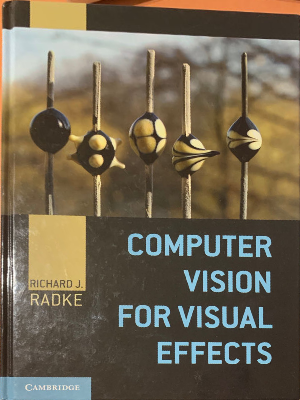

In [7]:
dst = cv2.warpPerspective(img,M2,(300, 400))
cv2_imshow(dst)